<a href="https://colab.research.google.com/github/Lawrence-Krukrubo/Building-a-Forward-Planning-Agent/blob/master/forward_planning_agent_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!rm planning.xlsx
!wget https://storage.googleapis.com/law1010/AIND_project_3_experiment.xlsx -O planning.xlsx

--2020-09-17 12:38:56--  https://storage.googleapis.com/law1010/AIND_project_3_experiment.xlsx
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c03::80, 2404:6800:4008:c04::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11205 (11K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘planning.xlsx’

planning.xlsx       100%[===================>]  10.94K  --.-KB/s    in 0s      

2020-09-17 12:38:57 (78.5 MB/s) - ‘planning.xlsx’ saved [11205/11205]



In [ ]:
xls = pd.ExcelFile('planning.xlsx')
print(type(xls))

<class 'pandas.io.excel._base.ExcelFile'>


Let's see the sheet names

In [ ]:
print(xls.sheet_names)

['problem_1', 'problem_2', 'problem _3', 'problem_4']


In [ ]:
prob_1 = pd.read_excel('planning.xlsx', sheet_name='problem_1', skiprows=2)
prob_1

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 1,breadth_first_search,20,43,56,178,6,0.004324
1,Air Cargo Problem 1,depth_first_graph_search,20,21,22,84,20,0.002299
2,Air Cargo Problem 1,uniform_cost_search,20,60,62,240,6,0.006638
3,Air Cargo Problem 1,greedy_best_first_graph_search h_unmet_goals,20,7,9,29,6,0.001128
4,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_levelsum,20,6,8,28,6,0.076109
5,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_maxlevel,20,6,8,24,6,0.053792
6,Air Cargo Problem 1,greedy_best_first_graph_search h_pg_setlevel,20,6,8,28,6,0.261131
7,Air Cargo Problem 1,astar_search h_unmet_goals,20,50,52,206,6,0.006688
8,Air Cargo Problem 1,astar_search h_pg_levelsum,20,28,30,122,6,0.186529
9,Air Cargo Problem 1,astar_search h_pg_maxlevel,20,43,45,180,6,0.198359


For Problem 2:

In [ ]:
prob_2 = pd.read_excel('planning.xlsx', sheet_name='problem_2', skiprows=2)
prob_2

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 2,breadth_first_search,72,3343,4609,30503,9,1.412719
1,Air Cargo Problem 2,depth_first_graph_search,72,624,625,5602,619,1.813666
2,Air Cargo Problem 2,uniform_cost_search,72,5154,5156,46618,9,2.400566
3,Air Cargo Problem 2,greedy_best_first_graph_search h_unmet_goals,72,17,19,170,9,0.014487
4,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_levelsum,72,9,11,86,9,1.578095
5,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_maxlevel,72,27,29,249,9,2.507638
6,Air Cargo Problem 2,greedy_best_first_graph_search h_pg_setlevel,72,9,11,84,9,6.143889
7,Air Cargo Problem 2,astar_search h_unmet_goals,72,2467,2469,22522,9,1.584434
8,Air Cargo Problem 2,astar_search h_pg_levelsum,72,357,359,3426,9,65.294872
9,Air Cargo Problem 2,astar_search h_pg_maxlevel,72,2887,2889,26594,9,261.383882


For problem 3

In [ ]:
prob_3 = pd.read_excel('planning.xlsx', sheet_name='problem _3', skiprows=2)
prob_3

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 3,breadth_first_search,88,14663,18098,129625,12,7.490619
1,Air Cargo Problem 3,depth_first_graph_search,88,408,409,3364,392,0.894157
2,Air Cargo Problem 3,greedy_best_first_graph_search h_unmet_goals,88,25,27,230,15,0.030409
3,Air Cargo Problem 3,greedy_best_first_graph_search h_pg_levelsum,88,14,16,126,14,5.022938
4,Air Cargo Problem 3,astar_search h_unmet_goals,88,7388,7390,65711,12,9.222211
5,Air Cargo Problem 3,astar_search h_pg_levelsum,88,369,371,3403,12,93.623633


For problem 4

In [ ]:
prob_4 = pd.read_excel('planning.xlsx', sheet_name='problem_4', skiprows=2)
prob_4

,Problem,Algorithm,Actions,Expansions,Goal_tests,New_nodes,Plan_length,Time
0,Air Cargo Problem 4,breadth_first_search,104,99736,114953,944130,14,72.864881
1,Air Cargo Problem 4,depth_first_graph_search,104,25174,25175,228849,24132,2465.383703
2,Air Cargo Problem 4,greedy_best_first_graph_search h_unmet_goals,104,29,31,280,18,0.037212
3,Air Cargo Problem 4,greedy_best_first_graph_search h_pg_levelsum,104,17,19,165,17,6.834336
4,Air Cargo Problem 4,astar_search h_unmet_goals,104,34330,34332,328509,14,50.453265
5,Air Cargo Problem 4,astar_search h_pg_levelsum,104,1208,1210,12210,15,600.920339


<b><h2>Analysis One:</h2></b>

Analyze the search complexity as a function of domain size, search algorithm, and heuristic.<br>
The report includes a table or chart to analyze the number of nodes expanded against the number of actions in the domain.

* The chart or table includes data for all search & heuristic combinations for air cargo problems 1 and 2.
* The chart or table includes data at least one uninformed search, two heuristics with greedy best first search, and two heuristics with A* on air cargo problems 3 and 4.
* Report includes at least a one paragraph discussion of these results that analyzes the growth trends as the problem size increases

First let's rename the Algorithms tpo make plotting easier

In [ ]:
index_12 = ['bfs','dfgs','ucs','gbfgs_ug','gbfgs_ls','gbfgs_ml','gbfgs_sl','a*s_ug','a*s_ls','a*s_ml','a*s_sl']
index_34 = ['bfs', 'dfgs', 'gbfgs_ug', 'gbfgs_ls', 'a*s_ug', 'a*s_ls']

In [ ]:
chart = prob_4.loc[:,['Actions', 'Expansions']]
chart.head()

,Actions,Expansions
0,104,99736
1,104,25174
2,104,29
3,104,17
4,104,34330


In [ ]:
len(chart)

6

In [ ]:
chart.index = index_34
chart.head()

,Actions,Expansions
bfs,104,99736
dfgs,104,25174
gbfgs_ug,104,29
gbfgs_ls,104,17
a*s_ug,104,34330


In [ ]:
chart['Expansions/Actions_Ratio'] = np.round(chart['Expansions'] // chart['Actions'])
chart.head()

,Actions,Expansions,Expansions/Actions_Ratio
bfs,104,99736,959
dfgs,104,25174,242
gbfgs_ug,104,29,0
gbfgs_ls,104,17,0
a*s_ug,104,34330,330


In [ ]:
sum(chart['Expansions/Actions_Ratio'])

1542

In [ ]:
chart['Expansions/Actions_Ratio'] = np.round(chart['Expansions/Actions_Ratio'] / sum(chart['Expansions/Actions_Ratio']),2)
chart.head()

,Actions,Expansions,Expansions/Actions_Ratio
bfs,104,99736,0.62
dfgs,104,25174,0.16
gbfgs_ug,104,29,0.00
gbfgs_ls,104,17,0.00
a*s_ug,104,34330,0.21


In [ ]:
chart.drop(['Actions', 'Expansions'], axis=1, inplace=True)
chart.head()

,Expansions/Actions_Ratio
bfs,0.62
dfgs,0.16
gbfgs_ug,0.00
gbfgs_ls,0.00
a*s_ug,0.21


In [253]:
def get_chart(table):
    chart = table.loc[:, ['Actions', 'Expansions']]
    actions = chart['Actions'][0]
    problem = table['Problem'][0]
    if len(chart) == 11:
        chart.index = index_12
    else:
        chart.index = index_34
    
    # Next, let's get the ratio of Expansions to Actions
    chart['Expansions/Actions_Ratio'] = np.round(chart['Expansions'] // chart['Actions'])

    # Let's normalize the ratio between 0 and 1 to make plotting easier
    chart['Expansions/Actions_Ratio'] = np.round(chart['Expansions/Actions_Ratio'] / sum(chart['Expansions/Actions_Ratio']),2)

    # Let's drop the columns we don't need for the plot
    chart.drop(['Actions', 'Expansions'], axis=1, inplace=True)
    
    return chart, actions, problem

In [273]:
def plot_bar_chart(chart_1, chart_2, problem):
    plt.figure(figsize=(16,5))
    sns.set(font_scale=1.2)
    sns.set_style('ticks') # change background to white background

    if problem in [1, 2]:
        plt.suptitle('Expansions/Actions Ratios for Air Cargo Problems 1 and 2', y=1.02)
        # For Problem 1
        plt.subplot(121)
        color_list = ['gold','purple','brown', 'red', 'yellow', 'black', 'aqua', 'pink',
                    'green', 'dimgray', 'crimson']
        plt.bar(x=chart_1.index, height=chart_1['Expansions/Actions_Ratio'], data=chart_1, color= color_list)
        plt.title(f'{ch1_problem}; Actions = {ch1_actions}')
        plt.xticks(np.arange(len(chart_1)), chart_1.index, rotation='vertical')
        plt.ylabel('Exp/Act Ratio')

        # For Problem 2
        plt.subplot(122)
        plt.bar(x=chart_2.index, height=chart_2['Expansions/Actions_Ratio'], data=chart_2, color= color_list)
        plt.title(f'{ch2_problem}; Actions = {ch2_actions}')
        plt.xticks(np.arange(len(chart_2)), chart_2.index, rotation='vertical')
        plt.ylabel('Exp/Act Ratio')

    else:
        plt.suptitle('Expansions/Actions Ratios for Air Cargo Problems 3 and 4', y=1.02)
        # For Problem 1
        plt.subplot(121)
        color_list = ['crimson','purple','brown', 'red', 'yellow', 'black']
        plt.bar(x=chart_1.index, height=chart_1['Expansions/Actions_Ratio'], data=chart_1, color= color_list)
        plt.title(f'{ch1_problem}; Actions = {ch1_actions}')
        plt.xticks(np.arange(len(chart_1)), chart_1.index, rotation='vertical')
        plt.ylabel('Exp/Act Ratio')

        # For Problem 2
        plt.subplot(122)
        plt.bar(x=chart_2.index, height=chart_2['Expansions/Actions_Ratio'], data=chart_2, color= color_list)
        plt.title(f'{ch2_problem}; Actions = {ch2_actions}')
        plt.xticks(np.arange(len(chart_2)), chart_2.index, rotation='vertical')
        plt.ylabel('Exp/Act Ratio')
    
    plt.show()
    

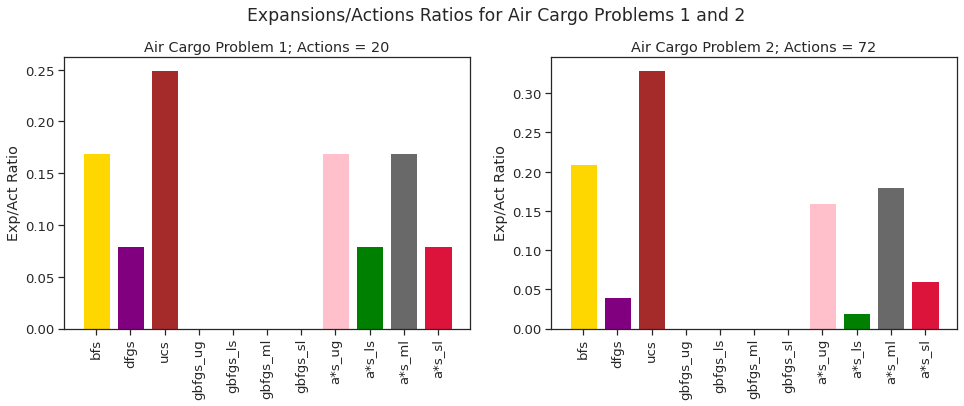

In [276]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_1)
chart_2, ch2_actions, ch2_problem = get_chart(prob_2)
plot_bar_chart(chart_1, chart_2, 2)

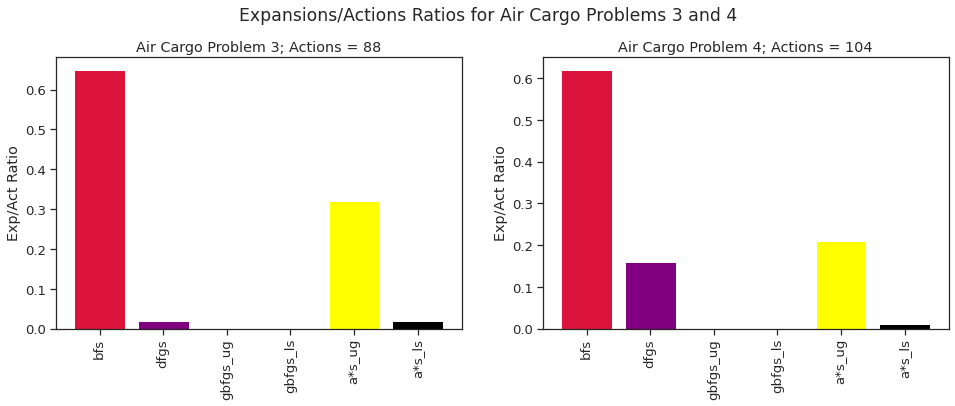

In [277]:
chart_1, ch1_actions, ch1_problem = get_chart(prob_3)
chart_2, ch2_actions, ch2_problem = get_chart(prob_4)
plot_bar_chart(chart_1, chart_2, 3)